# Obrada prirodnog jezika

## Uvod

Obrada prirodnog jezika je područje kojem se bavi područje računarstva i umjetne inteligencije, a ono obuhvaća problematiku komunikacije između računala i prirodnog (ljudskog) jezika, tj. kako omogućiti da računala daju što je moguće informativnije rezultate iz obrade podataka prirodnog jezika. <br> Razumijevanje i računalno prevođenje prirodnih jezika se najviše očituje u tome što mnoge riječi imaju višestruko značenje pa njihovo značenje ovisi o kontekstu u kojem se nalaze. Razumijevanje konteksta se pokazuje jednim od najvećih problema s kojim se susrećemo u obradi prirodnog jezika. <br> Uočavanje učestalog ponavljanja nekih riječi unutar teksta nam pomaže da taj tekst svrstamo pod neku kategoriju te onda lakše odredimo kontekst tog teksta pa samim time i značenje istog teksta. <br> Ovdje ćemo obraditi temu klasifikacije teksta, tj. riječi unutar njega.

### NLTK biblioteka

Pri obradi ove teme koristit ćemo NLTK biblioteku koja u sebi ima razne značajke i funkcije koja nam olakšava obradu prirodnog jezika.

In [1]:
import nltk
from nltk import *
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

#### NLTK.book
Modul nltk.book sadržava 9 djela iz različitih kategorija zbog raznolikosti skupa tekstova kako bi obrada bila što kvalitetnija.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Primjerice, u djelu Moby Dick, autora Marka Twaina, možemo vidjeti učestalost ponavljanja nekih riječi unutar djela te naći riječi koje imaju slično značenje (nalaze se u istom kontekstu).

In [3]:
text1.concordance("cannibal")

Displaying 19 of 19 matches:
azed , and wondered what monstrous cannibal and savage could ever have gone a 
e holy Sabbath , engaged in such a cannibal business as selling the heads of d
t was extinguished , and this wild cannibal , tomahawk between his teeth , spr
 , I kill - e !" again growled the cannibal , while his horrid flourishings of
hat that infernal harpooneer was a cannibal ?" " I thought ye know ' d it ;-- 
the whole a clean , comely looking cannibal . What ' s all this fuss I have be
of him . Better sleep with a sober cannibal than a drunken Christian . " Landl
ge house in the broad day , with a cannibal and a tomahawk ! " Queequeg !-- in
h sadly vitiated , I fear , by the cannibal propensity he nourished in his unt
tain , " I ' ll kill - e YOU , you cannibal , if you try any more of your tric
 . She was a thing of trophies . A cannibal of a craft , tricking herself fort
 had not suspected my friend was a cannibal , and furthermore announcing that 
that sight take a tooth

In [4]:
text1.similar("cannibal")

whale king whaleman ship pilot captain child vessel cry sea boat mate
touch brain whalemen warp squall harpooneer nantucketer parsee


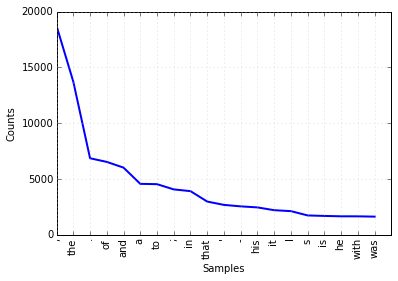

In [5]:
%matplotlib inline
fdist1 = FreqDist(text1)
fdist1.plot(20)

Gledajući graf najčešćih riječi u djelu Moby Dick, dolazimo do zaključka da najčešće riječi u djelima same po sebi nemaju neko značenje, te bi takvu pretragu trebali suziti, npr. samo na imenice, kako bi nam graf mogao odati neke informacije o djelu i kontekstu riječi unutar samog djela.

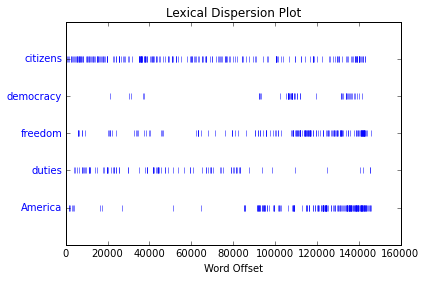

In [6]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Funkcijom dispersion_plot() možemo vidjeti gdje se određene riječi pojavljuju u danom djelu. Primjerice u skupu obraćanja javnosti američkih predsjednika od 1789-2009, zvane Inaugural Address Corpus, možemo vidjeti kako se u zadnje vrijeme naglasak američkih predsjednika stavlja na "Ameriku", tj. na njihovu državu i posebnost njihove države u međunarodnim okvirima.

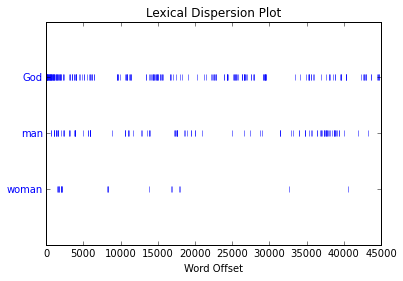

In [37]:
text3.dispersion_plot(["God", "man", "woman"])

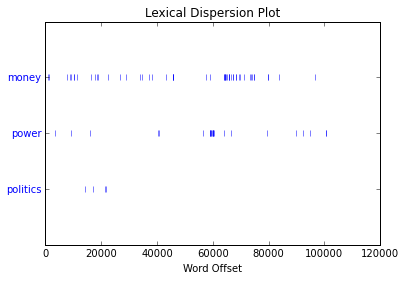

In [38]:
text7.dispersion_plot(["money", "power", "politics"])

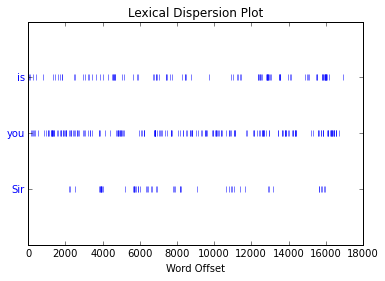

In [41]:
text6.dispersion_plot(["is", "you", "Sir"])

## Statistička obrada prirodnog jezika
Statistička obrada prirodnog jezika se bavi obradom prirodnog jezika pomoću statističkih metoda, strojnog učenja, itd. Razlikuje se od tradicionalne obrade prirodnog jezika u tome što ovdje jezikoslovci ne stvaraju model kako bi opisali neki jezikoslovnu pojavu, nego se umjesto toga model (polu)automatski izgradi iz jezično označenih tekstova. <br> Obradit ćemo par primjera koji će korisiti različite načine klasifikacije podataka pomoću nadziranog strojnog učenja.

In [22]:
from __future__ import division
import nltk
import matplotlib.pyplot as plt
from nltk.classify import apply_features
import random
import math

Ovo će nam biti potrebni moduli koje ćemo koristiti u našim primjerima.

### Prepoznavanje spola

Muška i ženska imena imaju imaju različite osobitosti. Jedna od tih je npr. zadnje slovo u imenu. Imena koja završavaju na 'o' su muška imena, dok imena koja završavaju na 'a' su često ženska imena. <br> Ovdje ćemo izgraditi model koji će učiti na temelju prvog i zadnjeg slova u imenima (koja su označena) te zadnja dva slova u imenu, s obzirom da ona isto tako jako određuju rod kojem pripada ime, te ćemo ga testirati na nekim primjerima.

In [32]:
def _gender_features(word):
  features = {}
  # started with 1 feature
  features["last_letter"] = word[-1].lower()
  # added some more
  features["first_letter"] = word[0].lower()
  for letter in "abcdefghijklmnopqrstuvwxyz":
    features["count(%s)" % letter] = word.lower().count(letter)
    features["has(%s)" % letter] = (letter in word.lower())
  # result of error analysis:
  # names ending in -yn are mostly female, and names ending
  # in -ch ar mostly male, so add 2 more features
  features["suffix2"] = word[-2:]
  return features

def naive_bayes_gender_classifier():
  from nltk.corpus import names
  names = ([(name, "male") for name in names.words("male.txt")] +
           [(name, "female") for name in names.words("female.txt")])
  random.shuffle(names)
#  featuresets = [(_gender_features(n), g) for (n,g) in names]
#  train_set, test_set = featuresets[500:], featuresets[:500]
#  advisable to stream the sets in for large data set.
  train_set = apply_features(_gender_features, names[500:])
  test_set = apply_features(_gender_features, names[:500])
  classifier = nltk.NaiveBayesClassifier.train(train_set)
  print ("Neo is", classifier.classify(_gender_features("Neo")))
  print ("Trinity is", classifier.classify(_gender_features("Trinity")))
  # calculate the accuracy of the classifier
  print (nltk.classify.accuracy(classifier, test_set))
  classifier.show_most_informative_features(5)

def error_analysis():
  from nltk.corpus import names
  names = ([(name, "male") for name in names.words("male.txt")] +
           [(name, "female") for name in names.words("female.txt")])
  random.shuffle(names)
  test_names, devtest_names, train_names = \
    names[:500], names[500:1500], names[1500:]
  train_set = [(_gender_features(n), g) for (n,g) in train_names]
  devtest_set = [(_gender_features(n), g) for (n,g) in devtest_names]
  test_set = [(_gender_features(n), g) for (n,g) in test_names]
  classifier = nltk.NaiveBayesClassifier.train(train_set)
  print (nltk.classify.accuracy(classifier, devtest_set))
  errors = []
  for (name, tag) in devtest_names:
    guess = classifier.classify(_gender_features(name))
    if guess != tag:
      errors.append((tag, guess, name))
  m = 0
  f = 0
  for (tag, guess, name) in sorted(errors):
    if(guess == "female"): f += 1
    if(guess == "male"): m += 1
    print ("correct=%s, guess=%s, name=%s" % (tag, guess, name))
  x_val = [0, 1]
  y_val = [m, f]
  plt.scatter(x_val,y_val)
  plt.show()

Neo is male
Trinity is female
0.782
Most Informative Features
                 suffix2 = 'na'           female : male   =    168.8 : 1.0
                 suffix2 = 'ia'           female : male   =     56.9 : 1.0
             last_letter = 'a'            female : male   =     37.4 : 1.0
                 suffix2 = 'sa'           female : male   =     35.6 : 1.0
             last_letter = 'k'              male : female =     32.1 : 1.0
0.798
correct=female, guess=male, name=Adriaens
correct=female, guess=male, name=Alyson
correct=female, guess=male, name=Amber
correct=female, guess=male, name=Audrey
correct=female, guess=male, name=Audy
correct=female, guess=male, name=Beau
correct=female, guess=male, name=Berthe
correct=female, guess=male, name=Betsey
correct=female, guess=male, name=Bevvy
correct=female, guess=male, name=Blair
correct=female, guess=male, name=Cat
correct=female, guess=male, name=Cher
correct=female, guess=male, name=Cherin
correct=female, guess=male, name=Christabel
cor

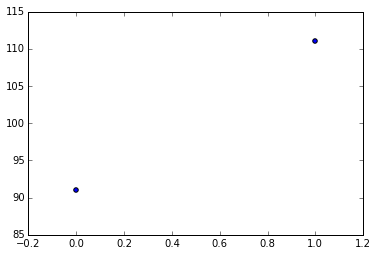

In [33]:
naive_bayes_gender_classifier()
error_analysis()

U analizi grešaka vidimo da je model više griješio kod imena muškog roda, pretpostavljajući da su ženska (1.0)

### Klasifikacija dokumenata
Za primjer klasifikacije dokumenata uzet ćemo filmske recenzije, koje ćemo pokušati klasificirati kao pozitivne ili negativne. Značajke koje ćemo koristiti u našem modelu, će biti 2000 najčešćih riječi koje se pojavljuju u danim filmskim recenzijama.

In [9]:
def _document_features(document, word_features):
  document_words = set(document)
  features = {}
  for word in word_features:
    features['contains({})'.format(word)] = (word in document_words)
  return features
  
def document_classification_movie_reviews():
  from nltk.corpus import movie_reviews
  documents = [(list(movie_reviews.words(fileid)), category)
                for category in movie_reviews.categories()
                for fileid in movie_reviews.fileids(category)]
  random.shuffle(documents)
  # use the most frequent 2000 words as features
  all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
  word_features = list(all_words.keys())[:2000]
  featuresets = [(_document_features(d, word_features), category)
                 for (d,category) in documents]
  train_set, test_set = featuresets[100:], featuresets[:100]
  classifier = nltk.NaiveBayesClassifier.train(train_set)
  print (nltk.classify.accuracy(classifier, test_set))
  classifier.show_most_informative_features(5)


In [10]:
document_classification_movie_reviews()

0.7
Most Informative Features
       contains(studies) = True              pos : neg    =      8.3 : 1.0
       contains(layered) = True              pos : neg    =      7.7 : 1.0
        contains(finest) = True              pos : neg    =      7.3 : 1.0
     contains(marvelous) = True              pos : neg    =      7.0 : 1.0
         contains(anger) = True              pos : neg    =      6.4 : 1.0


U našem modelu smo postigli točnost od oko 70%, te smo od naših 2000 značajki, izvukli 5 najinformativnijih.

### Označavanje dijela riječi (Part of speech tagging)
U ovom primjeru ćemo označavati dio riječi, tj. gledat ćemo najčešće sufikse riječi i onda ih klasificirati po tome. Primjerice, ako riječ u engleskom jeziku završava sa 's', vjerojatno je glagol, pa će dobiti oznaku 'VBZ' (verb tag).

In [34]:
def _pos_features(word, common_suffixes):
  features = {}
  for suffix in common_suffixes:
    features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
  return features

def pos_tagging_classification():
  # find most common suffixes of words
  from nltk.corpus import brown
  suffix_fdist = nltk.FreqDist()
  for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1
  common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]
  tagged_words = brown.tagged_words(categories="news")
  featuresets = [(_pos_features(w, common_suffixes), pos) for (w, pos) in tagged_words]
  size = int(len(featuresets) * 0.1)
  train_set, test_set = featuresets[size:], featuresets[:size]
  classifier = nltk.DecisionTreeClassifier.train(train_set)
  print (nltk.classify.accuracy(classifier, test_set))
  print (classifier.pseudocode(depth=4))

In [35]:
pos_tagging_classification()

0.6270512182993535
if endswith(the) == False: 
  if endswith(,) == False: 
    if endswith(s) == False: 
      if endswith(.) == False: return '.'
      if endswith(.) == True: return '.'
    if endswith(s) == True: 
      if endswith(is) == False: return 'PP$'
      if endswith(is) == True: return 'BEZ'
  if endswith(,) == True: return ','
if endswith(the) == True: return 'AT'



### Iskorištavanje konteksta
Nekad nije dovoljno samo gledati riječ da bi se saznalo njezino značenje, nego treba gledati i kontekst u kojem se nalazi. Primjerice, u engleskom jeziku, kada bi označavali riječ 'fly' bilo bi nam od velikog značaja kad bi znali nalazi li se ispred nje riječ 'a'. To bi npr. odredilo da se radi o imenici muha, a ne o glagolu letjeti. <br>
U ovom modelu ćemo za značajku uz sufikse unijeti riječ koja se nalazi neposredno iza riječi koju želimo označiti.

In [13]:
def _pos_features2(sentence, i):
  features = {
    "suffix(1)" : sentence[i][-1:],
    "suffix(2)" : sentence[i][-2:],
    "suffix(3)" : sentence[i][-3:]}
  if i == 0:
    features["prev-word"] = "<START>"
  else:
    features["prev-word"] = sentence[i - 1]
  return features

def pos_tagging_classification_with_sentence_context():
  from nltk.corpus import brown
  tagged_sents = brown.tagged_sents(categories="news")
  featuresets = []
  for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
      featuresets.append((_pos_features2(untagged_sent, i), tag))
  size = int(len(featuresets) * 0.1)
  train_set, test_set = featuresets[size:], featuresets[:size]
  classifier = nltk.NaiveBayesClassifier.train(train_set)
  print (nltk.classify.accuracy(classifier, test_set))

In [14]:
pos_tagging_classification_with_sentence_context()

0.7891596220785678


Vidimo kako je dodavanje konteksta kao značajke u naš model doprinijelo boljem označavanju riječi.